# Intro to csv, numpy, pandas, and matplotlib

In [1]:
from __future__ import print_function

import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt

## csv

In [2]:
file = open('iris.csv', 'r') # load data into file
reader = csv.reader(file)  # reader generates a list of lists
lines = list(reader)  # turn generator into list of lists
print(len(lines))
print(lines[0])

150
['5.1', '3.5', 'Iris-setosa']


## numpy

In [3]:
lines_matrix = np.asarray(lines)  # convert list of lists into character matrix
print(lines_matrix.shape, type(lines_matrix))

(150, 3) <type 'numpy.ndarray'>


In [4]:
features = lines_matrix[:, 0:2].astype(np.float)  # retrieve only feature cols, convert to float
labels = list(lines_matrix[:, 2])
print(features.shape, len(labels))
mean, std = np.mean(features), np.std(features) # get mean, and std
print(mean, std)
labels_set = set(labels) # get unique labels
print(labels_set)

(150, 2) 150
4.44866666667 1.54241095547
set(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor'])


## pandas

In [5]:
df_iris = pd.read_csv('iris.csv', header=None,
                      names=['sepal_length', 'sepal_width', 'label'])  # load data into pandas
print(df_iris.shape, type(df_iris))
print(df_iris.describe())  # get mean, std, etc.
print(df_iris['label'].unique())

(150, 3) <class 'pandas.core.frame.DataFrame'>
       sepal_length  sepal_width
count    150.000000   150.000000
mean       5.843333     3.054000
std        0.828066     0.433594
min        4.300000     2.000000
25%        5.100000     2.800000
50%        5.800000     3.000000
75%        6.400000     3.300000
max        7.900000     4.400000
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


## matplotlib

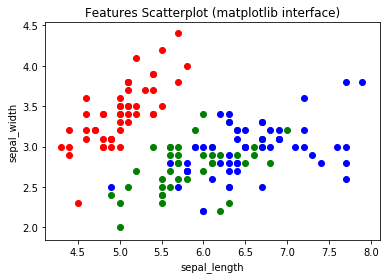

In [6]:
fig, ax = plt.subplots()
plt.title('Features Scatterplot (matplotlib interface)')
ax.scatter(x='sepal_length', y='sepal_width', c='red', data=df_iris.where(df_iris['label'] == 'Iris-setosa'))
ax.scatter(x='sepal_length', y='sepal_width', c='green', data=df_iris.where(df_iris['label'] == 'Iris-versicolor'))
ax.scatter(x='sepal_length', y='sepal_width', c='blue', data=df_iris.where(df_iris['label'] == 'Iris-virginica'))
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')
plt.show()

## using both pandas and matplotlib

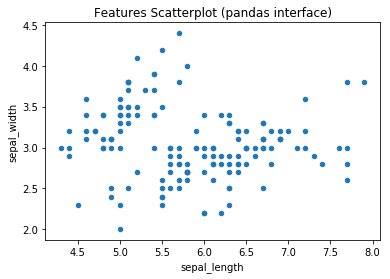

In [9]:
df_iris.plot.scatter(x='sepal_length', y='sepal_width', title='Features Scatterplot (pandas interface)')
plt.show()

Iris-virginica std:
sepal_length    0.635880
sepal_width     0.322497
dtype: float64

Iris-setosa std:
sepal_length    0.352490
sepal_width     0.381024
dtype: float64

Iris-versicolor std:
sepal_length    0.516171
sepal_width     0.313798
dtype: float64



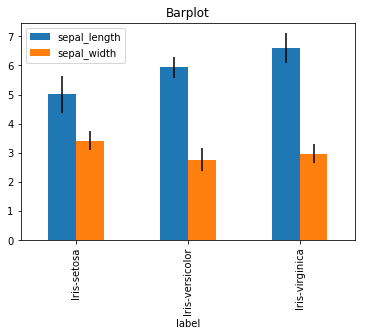

In [12]:
yerr_mat = np.zeros((2,3))
for i, label in enumerate(labels_set):
    print(label, 'std:')
    print(df_iris.where(df_iris['label'] == label).std())
    print()
    yerr_mat[:, i] = df_iris.where(df_iris['label'] == label).std()
df_iris.groupby('label').mean().plot.bar(title='Barplot', yerr=yerr_mat)
plt.show()

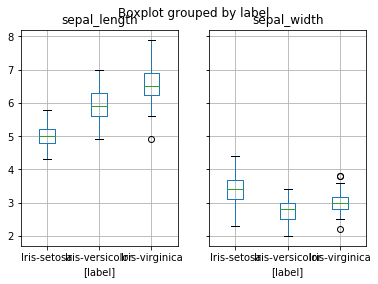

In [13]:
df_iris.boxplot(by='label')
plt.show()

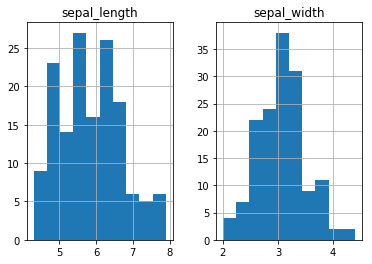

In [14]:
df_iris.hist()
plt.show()